In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 91
nx = 20
nb = 2
nu = 5
nc = 4

In [3]:
time_grid = np.loadtxt("sol1/time_grid.txt") / 3600

# Set number to either 0: easier, or 1: harder
expnum = 2;

# Create filename using expnum
lcqp_sol_file = r"sol%d/x_opt_LCQPow.txt" % expnum;
gurobi_sol_file = r"sol%d/x_opt_gurobi.txt" % expnum;

v_opt = {
    "lcqpow": np.loadtxt(lcqp_sol_file), # <- change this
    "gurobi": np.loadtxt(gurobi_sol_file), # Gurobi runtime: approx. 60 s
}

x_data = {"lcqpow": [], "gurobi": []}
u_data = {"lcqpow": [], "gurobi": []}
b_data = {"lcqpow": [], "gurobi": []}

for solver in v_opt.keys():

    offset = 0
    
    for k in range(N):

        x_data[solver].append(v_opt[solver][offset:offset+nx])
        offset += nx

        b_data[solver].append(v_opt[solver][offset:offset+nb])
        offset += nb

        offset += nx
        offset += 1

        u_data[solver].append(v_opt[solver][offset:offset+nu])
        offset += nu

    x_data[solver].append(v_opt[solver][offset:offset+nx])
    offset += nx

    x_data[solver] = np.vstack(x_data[solver])
    u_data[solver] = np.vstack(u_data[solver])
    b_data[solver] = np.vstack(b_data[solver])

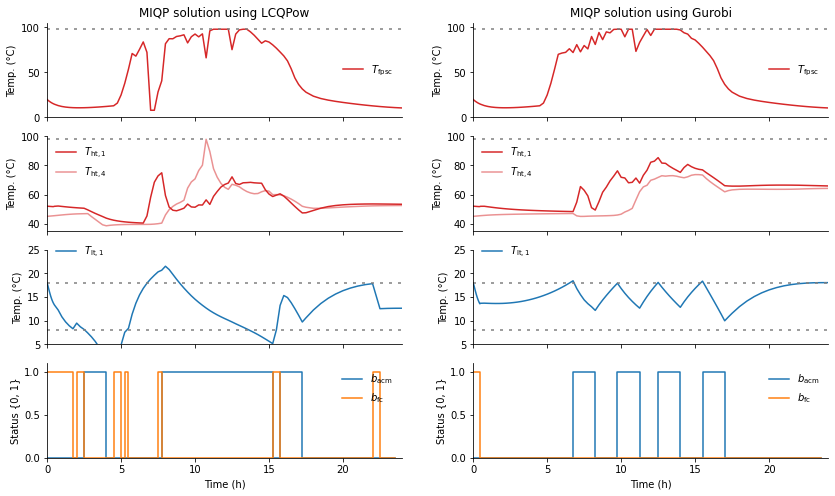

In [4]:
fig, ax = plt.subplots(4, 2, sharex=True, figsize=(14,8))

ax[0][0].plot(time_grid, x_data["lcqpow"][:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][0].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[0][1].plot(time_grid, x_data["gurobi"][:,6], color = "#d62728ff", label = "$T_\mathsf{fpsc}$")
ax[0][1].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))

for ax_j in ax[0]:
    ax_j.set_ylim(0,105)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="center right", framealpha=0.0)

    
ax[1][0].plot(time_grid, x_data["lcqpow"][:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][0].plot(time_grid, x_data["lcqpow"][:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][0].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))  
ax[1][1].plot(time_grid, x_data["gurobi"][:,0], color="#d62728ff", label = "$T_\mathsf{ht,1}$")
ax[1][1].plot(time_grid, x_data["gurobi"][:,3], color="#d6272880", label = "$T_\mathsf{ht,4}$")
ax[1][1].plot([time_grid[0], time_grid[-1]], [98.0, 98.0], color = "C7", linestyle="dashed", dashes=(2, 4))

for ax_j in ax[1]:
    ax_j.set_ylim(35,100)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="upper left", framealpha=0.0)

    
ax[2][0].plot(time_grid, x_data["lcqpow"][:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt,1}$")
ax[2][0].plot([time_grid[0], time_grid[-1]], [18.0, 18.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[2][0].plot([time_grid[0], time_grid[-1]], [8.0, 8.0], color = "C7", linestyle="dashed", dashes=(2, 4))

ax[2][1].plot(time_grid, x_data["gurobi"][:,4], color = "#1f77b4ff", label = "$T_\mathsf{lt,1}$")
ax[2][1].plot([time_grid[0], time_grid[-1]], [18.0, 18.0], color = "C7", linestyle="dashed", dashes=(2, 4))
ax[2][1].plot([time_grid[0], time_grid[-1]], [8.0, 8.0], color = "C7", linestyle="dashed", dashes=(2, 4))

for ax_j in ax[2]:
    ax_j.set_ylim(5,25)
    ax_j.set_ylabel("Temp. (°C)")
    ax_j.legend(loc="upper left", ncol=2, framealpha=0.0, bbox_to_anchor=(0, 1.15, 1.1, 0.0))


ax[3][0].step(time_grid[:-1], b_data["lcqpow"][:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][0].step(time_grid[:-1], b_data["lcqpow"][:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")

ax[3][1].step(time_grid[:-1], b_data["gurobi"][:,0], where="post", color = "#1f77b4ff", label = "$b_\mathsf{acm}$")
ax[3][1].step(time_grid[:-1], b_data["gurobi"][:,1], where="post", color = "#ff7f0eff", label = "$b_\mathsf{fc}$")

for ax_j in ax[3]:
    ax_j.set_ylim(0, 1.1)
    ax_j.set_ylabel("Status {0, 1}")
    ax_j.legend(loc="upper right", framealpha=0.0)
    
for ax_j in ax[-1]: 
    ax_j.set_xlim(time_grid[0], time_grid[-1])
    ax_j.set_xlabel("Time (h)")

for ax_k in ax:
    for ax_k_j in ax_k:
        ax_k_j.spines["top"].set_visible(False)
        ax_k_j.spines["right"].set_visible(False)

        
ax[0][0].set_title("MIQP solution using LCQPow")
ax[0][1].set_title("MIQP solution using Gurobi")
 
plt.show();
figname = r"/home/syscop/paper-lcqp-2/figures/MIQP/comparison%d.pdf" % expnum;
fig.savefig(figname, format="pdf", bbox_inches="tight");